<a href="https://colab.research.google.com/github/LivenetsTatiana/works/blob/main/MachineLearning/DigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **<center>Распознование рукописных цифр<center/>**
**Цель**: поистроить нейронную сеть для распознования рукописных чисел по картинкам

**Задания:**
1. Описание исходных данных.
2. Подготовка данных для работы с нейронной сетью.
3. Построение модели нейронной сети и ее визуализация.
4. Визуализация процесса обучения модели.
5. Проверка модели на тестовом наборе данных. Выводы.
6. Проверка на созданных рукописных цифрах



In [ ]:
# необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, utils
from keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Activation

from tensorflow.keras.datasets import mnist
from keras.utils.image_utils import load_img

# Загрузка данных

В качестве датасета используется mnist, который представляет из себя изображения рукописных цифр размером 28*28 пикселей

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

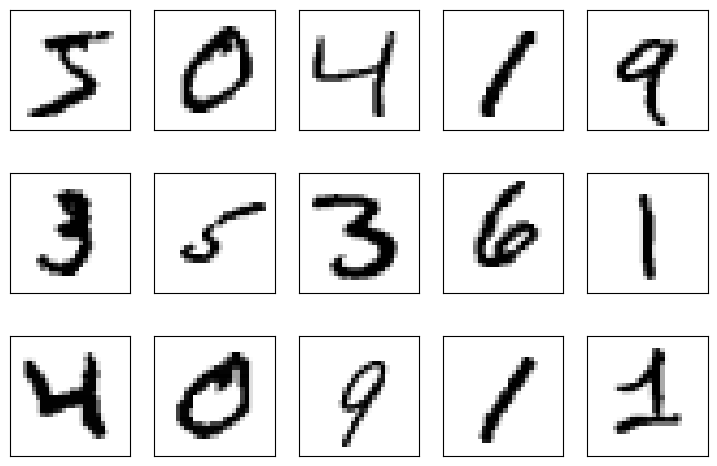

In [ ]:
# отображаем часть данных датасета (первые 15 цифр)
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})
for j in range(3):
  for i in range(5):
    axs[j, i].imshow(x_train[j*10+i], cmap='binary', interpolation='nearest')

# Нормализация данных

In [ ]:
#приведение значения яркости каждого пикселя исходных изображений из диапазона [0, 255] в диапазон [0, 1].
#print(x_train[0])
x_train = x_train/255
x_test = x_test/255


# Векторизация меток класса

In [ ]:
#векторизация ответов, что это за цифра
#в итоге получаем вектор, индекс 1 в котором означает пренадлежность к классу цифры индекса
y_test_ = y_test
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Построение модели

Строим персептрон с 3 слоями (входной, скрытый и выходной)

In [ ]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


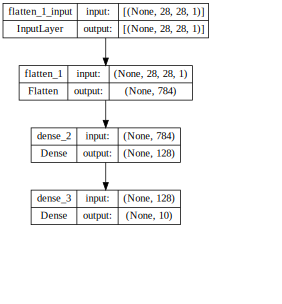

In [ ]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

Метрика - точность, функция потерь - categorical_crossentropy, оптимизация - adam

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2565 - accuracy: 0.9272 - val_loss: 0.1368 - val_accuracy: 0.9598
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1124 - accuracy: 0.9668 - val_loss: 0.1021 - val_accuracy: 0.9700
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0779 - accuracy: 0.9763 - val_loss: 0.0818 - val_accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0582 - accuracy: 0.9822 - val_loss: 0.0733 - val_accuracy: 0.9759
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0450 - accuracy: 0.9859 - val_loss: 0.0749 - val_accuracy: 0.9762
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0348 - accuracy: 0.9892 - val_loss: 0.0769 - val_accuracy: 0.9782
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0278 - accuracy: 0.9916 - val_loss: 0.0719 - val_accura

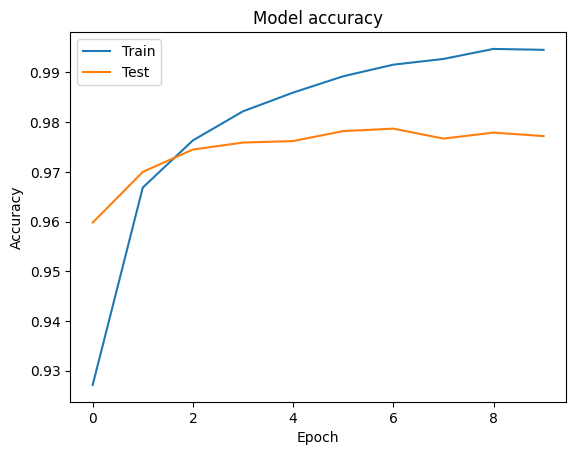

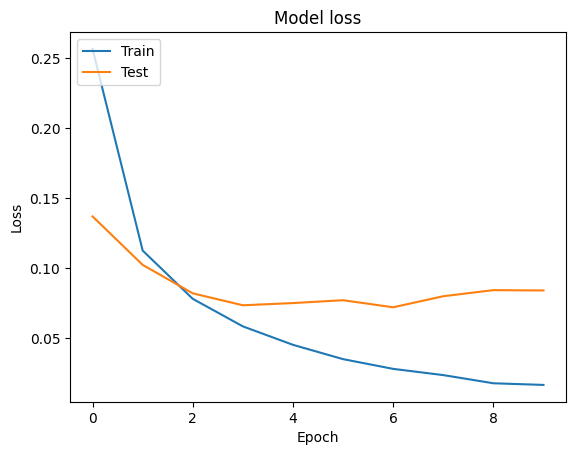

313/313 [==============================] - 1s 2ms/step
[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Plot training & validation accuracy values
plt.plot (history.history['accuracy'])

plt.plot (history.history['val_accuracy'])
plt.title('Model accuracy')

plt.ylabel ('Accuracy')
plt.xlabel ('Epoch')

plt.legend(['Train', 'Test'], loc="upper left")
plt.show()

# Plot training & validation loss values
plt.plot (history.history['loss'])

plt.plot (history.history['val_loss'])
plt.title('Model loss')

plt.ylabel ("Loss")

plt.xlabel ("Epoch")

plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


ynew = (model.predict(x_test) > 0.5).astype("int32")
print(ynew)

# Проверка на тестовых данных датасета

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 26ms/step
[[2.7184823e-09 1.0845868e-09 9.9999821e-01 1.2661211e-08 3.9046094e-23
  5.7078626e-07 1.0828046e-06 7.9634503e-21 1.2858689e-07 2.7451459e-19]]


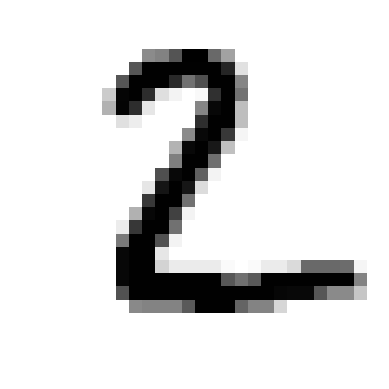

In [ ]:
k = 1 # индекс изображения в датасете
plt.imshow(x_test[k], cmap='binary')
plt.axis('off')
print(y_test[k])
print(
    model.predict(np.array([x_test[k]]))
)

Цифру 2 распознает верно

Выведем цифры, которые распознаюься неверно:

313/313 [==============================] - 1s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[ True  True  True  True  True  True  True  True  True  True]
(228, 28, 28)


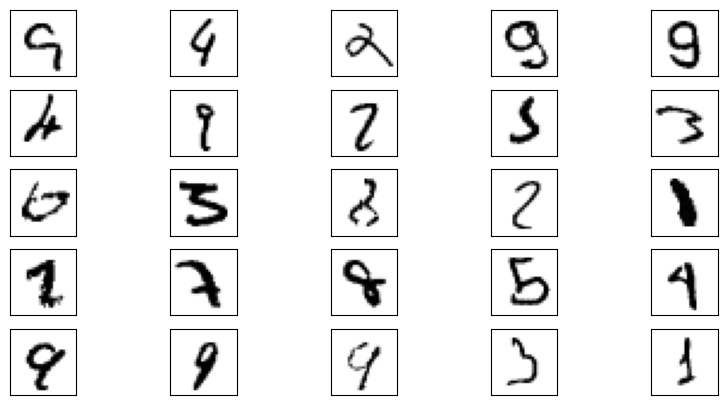

In [ ]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test_[:20])

# Выделение неверных вариантов
mask = pred == y_test_
print(mask[:10])

x_false = x_test[~mask]
y_false = x_test[~mask]

print(x_false.shape)

# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()

Таким образом из 10000 228 цифр распознаны неверно

# Проверка на рукописных цифрах

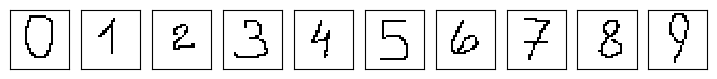

In [ ]:
x = [0]*10
for i in range(10):
  x[i] = np.asarray(load_img('%s.png' %i).convert('L'))
for i in range(10):
  for j in range(28):
    for k in range(28):
      if(x[i][j][k]==255):
        x[i][j][k]=0
      else:
        x[i][j][k]=1
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})
for i in range(10):
    axs[i].imshow(x[i], cmap='binary', interpolation='nearest')

1/1 [==============================] - 0s 24ms/step


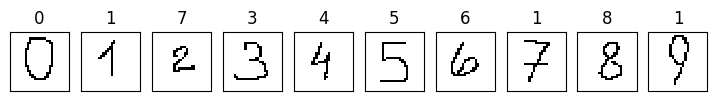

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})
for k in range(10):
  axs[k].imshow(x[k], cmap='binary', interpolation='nearest' )
  a=model.predict(np.array([x[k]]))
  axs[k].set_title(np.argmax(a))

Распознаны 7 цифр из 10 (2, 7 и 9 определены неверно)


# **Вывод**

Построена нейронная сеть с 3 слоями, которая принимает на вход массив, задающий цифры 28*28 пикселей и выдает массив с 0 и 1, индекс положения 1 в котром - цифра, которая была распознана моделью.

В качестве функции активации в скрытом слое использовалась relu, а в выходном - softmax

Затем нейронная сеть были обучена. Расчет потерь осуществлялся с помощью categorical_crossentropy, в качестве метрики выбиралась точность.

Как видно их визуализации процесса обучения потери у model уменьшаются, а точность на 10 эпохе составила 0.9945.

После проверки на тестовых данных выведены изображения цифр, которые распознаются неправильно, причем два изображения из них похожи на созданные самостоятельно цифры, которые также были распознаны неправильно (2 и 9)

Из рукописных цифр распознаны 7 из 10, но тут многое зависит от почерка человека и наличия похожих изображений в обучающей выборке